<h3 style="color:#C0C0C0;text-align:center;font-size: smaller;">Applied Machine Learning and Data Mining - U26538</h3>

<br>
<h1 style="color:#800080;text-align:center;"> Practical Exercise (16)</h1>
<h2 style="color:#800080;text-align:center;">K-means Clustering</h2>

<b>Question 1:</b>
<li>Download the mall customer dataset from Moodle.</li>
<li>Apply K-means clustering to group the customers based on the following attributes:</li>
<ul><li>Gender and spending score.</li>
<li>Age and spending score.</li></ul>
<li>Apply the elbow method to find the optimal number of K.</li>
<li>Analyze and visualize the results.</li>

<b>Question 2:</b>

<li>Download the Glass dataset from Moodle.</li>
<li>Define the objective and the attributes that were selected for clustering.</li>
<li>Find the optimal number of K then Apply k-means clustering.</li>
<li>Analyze and visualize the results.</li>
<li>Evaluate the clustering results.</li>


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [30]:
dt = pd.read_csv('mallcustomers.csv')


In [31]:
dt.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
dt.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [33]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
dt['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

c:\Users\krujo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


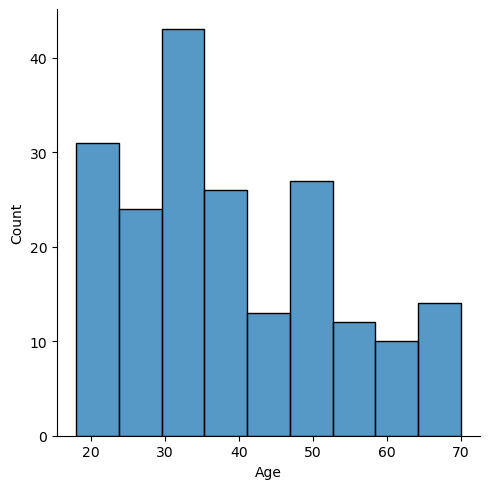

In [35]:
sns.displot(dt['Age'])

In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dt['Genre'] = encoder.fit_transform(dt['Genre'])


In [37]:
from sklearn.cluster import KMeans

In [38]:
kmeans = KMeans(n_clusters= 5, init='k-means++',max_iter=300, random_state=0)

y_kmeans = kmeans.fit_predict(dt)

c:\Users\krujo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\krujo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [42]:
kmeans = KMeans(n_clusters=3).fit(dt)
centroids = kmeans.cluster_centers_
print(centroids)

c:\Users\krujo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\krujo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[166.5          0.45588235  36.04411765  88.91176471  50.20588235]
 [ 96.98591549   0.46478873  43.1971831   59.35211268  50.5915493 ]
 [ 31.01639344   0.39344262  36.91803279  30.36065574  49.73770492]]


c:\Users\krujo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\krujo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


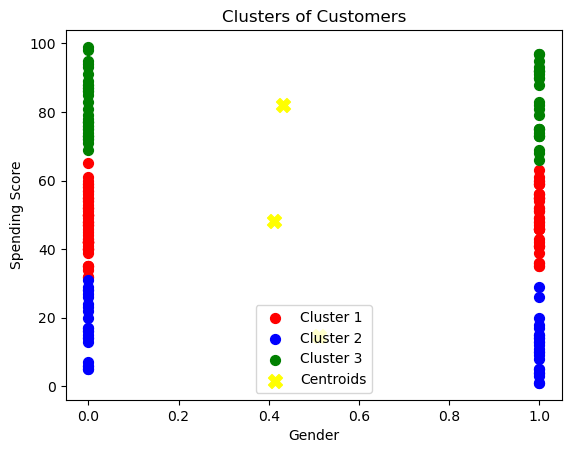

In [51]:
X = dt[['Genre', 'Spending Score (1-100)']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X[y_kmeans == 0]['Genre'], X[y_kmeans == 0]
            ['Spending Score (1-100)'], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1]['Genre'], X[y_kmeans == 1]
            ['Spending Score (1-100)'], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2]['Genre'], X[y_kmeans == 2]
            ['Spending Score (1-100)'], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=100, c='yellow', label='Centroids', marker='X')
plt.title('Clusters of Customers')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

c:\Users\krujo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\krujo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


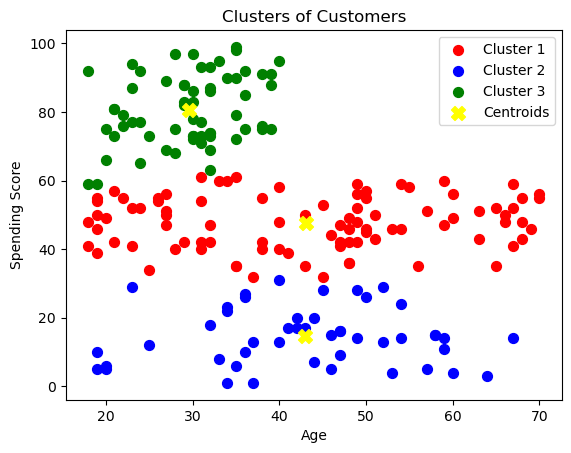

In [53]:
X = dt[['Age', 'Spending Score (1-100)']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X[y_kmeans == 0]['Age'], X[y_kmeans == 0]
            ['Spending Score (1-100)'], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1]['Age'], X[y_kmeans == 1]
            ['Spending Score (1-100)'], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2]['Age'], X[y_kmeans == 2]
            ['Spending Score (1-100)'], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=100, c='yellow', label='Centroids', marker='X')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()